<a href="https://colab.research.google.com/github/0707071/-Mobile-Phone-Data-Cleaning-EDA-Project/blob/main/EDA_on_smartphones_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Exploratory Data Analysis (EDA) - Mobile Phone Dataset

**Author:** Muhammad Ali Mumtaz  


---

## 📌 Notebook Overview

This notebook performs **Exploratory Data Analysis (EDA)** on the fully cleaned and imputed mobile phone dataset. The goal is to understand the distribution, relationships, and trends in the data using clean, modular, and reusable visualization functions.

---

## 📈 What’s Covered:
- Univariate analysis for both **categorical** and **numerical** variables  
- Bivariate analysis between **numerical and categorical** features  
- Statistical testing using **ANOVA** and **Chi-Square** tests  
- Group-wise comparisons and visual summaries  

---

## 🧰 Key Highlights:
- All plots are created using **modular Python functions** with built-in customization options.
- Functions can be reused across different datasets and projects by changing input parameters.
- Includes box plots, histograms, KDE plots, pie charts, bar plots, violin plots, and more.

---

## 🛠️ Customizable Functions Used:
- `univariate_categorical_analysis()`  
- `univariate_cont_analysis()`  
- `bivar_num_cat_analysis()`  
- `perform_anova()`  
- `perform_chi2_test()`

These functions support optional arguments like `top_k`, `hue`, and `figsize` to adapt the visual output as needed.

---

By the end of this notebook, we develop a strong intuition for the dataset structure and feature behavior to guide feature selection and modeling.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the df

data_path = "/content/smartphones_data.csv"

df = pd.read_csv(data_path)

In [ ]:
df.set_index("model_name", inplace=True)

In [ ]:
df.head()

,price,rating,brand,number_of_sim,has_5G,has_NFC,has_IR_Blaster,cpu_speed,number_of_cores,memory,...,fast_charging,fast_charging_power,display_size,resolution,refresh_rate,rear_camera,front_camera,num_of_cameras,card_size,has_card
model_name,,,,,,,,,,,,,,,,,,,,,
11 5G,54999.0,89.0,Oneplus,2,True,True,False,3.2,8,12.0,...,1.0,100.0,6.70,1440 x 3216,120.0,50.0,16.0,Triple,0.0,False
Nord CE 2 Lite 5G,19989.0,81.0,Oneplus,2,True,False,False,2.2,8,6.0,...,1.0,33.0,6.59,1080 x 2412,120.0,64.0,16.0,Triple,1024.0,True
Galaxy A14 5G,16499.0,75.0,Samsung,2,True,False,False,2.4,8,4.0,...,1.0,15.0,6.60,1080 x 2408,90.0,50.0,13.0,Triple,1024.0,True
Moto G62 5G,14999.0,81.0,Motorola,2,True,False,False,2.2,8,6.0,...,1.0,0.0,6.55,1080 x 2400,120.0,50.0,16.0,Triple,1024.0,True
10 Pro Plus,24999.0,82.0,Realme,2,True,False,False,2.6,8,6.0,...,1.0,67.0,6.70,1080 x 2412,120.0,108.0,16.0,Triple,0.0,False


In [ ]:
# shape of data

df.shape

(962, 22)

In [ ]:
# missing values

df.isnull().sum().loc[lambda ser: ser > 0]

,0
cpu_speed,43
display_size,3
resolution,3
front_camera,42


## convert dtypes

1. memory --> int
2. storage --> int
3. capacity --> int
4. fast_charging --> bool
5. fast_charging_power --> int
6. refresh_rate --> int
7. card_size --> int

In [ ]:
# make column list

df.select_dtypes("float").columns

Index(['price', 'rating', 'cpu_speed', 'memory', 'storage', 'capacity',
       'fast_charging', 'fast_charging_power', 'display_size', 'refresh_rate',
       'rear_camera', 'front_camera', 'card_size'],
      dtype='object')

In [ ]:
convert_to_int = ['memory', 'storage', 'capacity', 'fast_charging_power', 'refresh_rate', "card_size"]

In [ ]:
def convert_dtypes(df: pd.DataFrame) -> pd.DataFrame:
    """
    Converts specified columns to integer type and 'fast_charging' column to boolean.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame containing columns to be converted.

    Returns
    -------
    pd.DataFrame
        DataFrame with specified columns converted to int64 and 'fast_charging' as bool.

    Notes
    -----
    The list `convert_to_int` must be defined and contain the names of columns to convert to int.
    """
    return (
        df
        .assign(
            **{col: df[col].astype(np.int64) for col in convert_to_int},
            fast_charging=df["fast_charging"].astype(bool)
        )
    )


In [ ]:
df = df.pipe(convert_dtypes)

In [ ]:
# datatypes

df.dtypes

,0
price,float64
rating,float64
brand,object
number_of_sim,int64
has_5G,bool
has_NFC,bool
has_IR_Blaster,bool
cpu_speed,float64
number_of_cores,int64
memory,int64


In [ ]:
# info on the data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 962 entries, 11 5G to Moto Edge S30 Pro
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                962 non-null    float64
 1   rating               962 non-null    float64
 2   brand                962 non-null    object 
 3   number_of_sim        962 non-null    int64  
 4   has_5G               962 non-null    bool   
 5   has_NFC              962 non-null    bool   
 6   has_IR_Blaster       962 non-null    bool   
 7   cpu_speed            919 non-null    float64
 8   number_of_cores      962 non-null    int64  
 9   memory               962 non-null    int64  
 10  storage              962 non-null    int64  
 11  capacity             962 non-null    int64  
 12  fast_charging        962 non-null    bool   
 13  fast_charging_power  962 non-null    int64  
 14  display_size         959 non-null    float64
 15  resolution           959 no

In [ ]:
# duplicates in data

df.duplicated().sum()

np.int64(3)

In [ ]:
# Checking the duplicates

(
    df
    .loc[df.duplicated(keep=False)]
    .sort_values("price")
)

,price,rating,brand,number_of_sim,has_5G,has_NFC,has_IR_Blaster,cpu_speed,number_of_cores,memory,...,fast_charging,fast_charging_power,display_size,resolution,refresh_rate,rear_camera,front_camera,num_of_cameras,card_size,has_card
model_name,,,,,,,,,,,,,,,,,,,,,
Y15s,8499.0,66.0,Vivo,2,False,False,False,2.30,8,3,...,False,0,6.51,720 x 1600,60,13.0,8.0,Dual,1024,True
Y15C,8499.0,66.0,Vivo,2,False,False,False,2.30,8,3,...,False,0,6.51,720 x 1600,60,13.0,8.0,Dual,1024,True
Redmi Note 11E 5G,13990.0,69.0,Xiaomi,2,True,False,True,2.20,8,4,...,True,18,6.58,1080 x 2408,90,50.0,5.0,Dual,0,False
Redmi 10 Prime Plus 5G,13990.0,69.0,Xiaomi,2,True,False,True,2.20,8,4,...,True,18,6.58,1080 x 2408,90,50.0,5.0,Dual,0,False
Reno 8 Pro House of Dragon Edition,45999.0,86.0,Oppo,2,True,True,False,2.85,8,12,...,True,80,6.70,1080 x 2412,120,50.0,32.0,Triple,0,False
Reno 8 Pro 5G,45999.0,86.0,Oppo,2,True,True,False,2.85,8,12,...,True,80,6.70,1080 x 2412,120,50.0,32.0,Triple,0,False


In [ ]:
# drop the duplicates

df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# statistical decription

df.select_dtypes(float).describe().loc[:,:"display_size"]

,price,rating,cpu_speed,display_size
count,959.000000,959.000000,916.000000,956.000000
mean,31628.346194,78.066562,2.425568,6.538337
std,38606.345311,7.326437,0.456836,0.268720
min,4499.000000,60.000000,1.200000,4.700000
25%,12999.000000,74.000000,2.050000,6.500000
50%,19990.000000,79.000000,2.300000,6.580000
75%,34999.000000,84.000000,2.840000,6.670000
max,650000.000000,89.000000,3.220000,8.000000


**Observations**

In [ ]:
df["price"].skew()

np.float64(7.134996391645077)

## Univariate

In [ ]:
df["brand"]

,brand
model_name,
11 5G,Oneplus
Nord CE 2 Lite 5G,Oneplus
Galaxy A14 5G,Samsung
Moto G62 5G,Motorola
10 Pro Plus,Realme
...,...
Civi 3,Xiaomi
Find X6,Oppo
A23s,Itel


In [ ]:
def univariate_categorical_analysis(ser: pd.Series, show_categories=False, top_k=5, figsize=(12,8)):
    """
    Performs univariate analysis on categorical variables.

    Features:
    - Displays number of unique categories.
    - Optionally lists all unique categories.
    - Shows counts and percentages of top categories.
    - Reports number of missing values.
    - Plots a countplot and pie chart for the top categories.

    This function is highly customizable and can be tailored according to your needs through its parameters:
    - `show_categories`: Whether to print all unique categories (default False).
    - `top_k`: Number of top categories to display and plot (default 5).
    - `figsize`: Size of the generated plots (default (12,8)).

    Parameters
    ----------
    ser : pd.Series
        Categorical data to analyze.
    show_categories : bool, optional
        Whether to print all unique categories, by default False.
    top_k : int or None, optional
        Number of top categories to display and plot, by default 5.
        If None, all categories will be used.
    figsize : tuple, optional
        Size of the matplotlib figure, by default (12, 8).
    """
    # number of unique values
    num_unique_values = ser.nunique()
    print(f"The number of unique values in {ser.name} are: {num_unique_values}", end="\n\n")

    # unique categories in the data
    if show_categories:
        unique_categories = ser.unique().tolist()
        for i, category in enumerate(unique_categories, start=1):
            print(f"{i}.: {category}")

    # value counts
    value_counts_in_num = ser.value_counts()
    value_counts_in_per = ser.value_counts(normalize=True).mul(100).round(2)
    value_counts_info = pd.concat([value_counts_in_num, value_counts_in_per], axis=1)
    if top_k:
        display(value_counts_info.head(top_k))
    else:
        display(value_counts_info)

    # missing values
    missing_values = ser.isna().sum()
    print(f"\nThe number of missing values in {ser.name} are: {missing_values}", end="\n\n\n")

    if top_k:
        top_cat = value_counts_info.head(top_k).index.to_list()
        filtered_ser = ser.loc[ser.isin(top_cat)]

    # plotting
    fig, ax = plt.subplots(2,1,figsize=figsize)
    # count plot
    ax[0].set_title(f"Countplot of {ser.name}")
    sns.countplot(x=filtered_ser, ax=ax[0],)
    # pie chart
    ax[1].set_title(f"Pie chart of {ser.name}")
    value_counts_in_num.head(top_k).plot(kind="pie", ax=ax[1], autopct="%0.2f%%")
    plt.tight_layout()
    plt.show()





The number of unique values in brand are: 43



,count,proportion
brand,,
Xiaomi,131,13.66
Samsung,129,13.45
Vivo,105,10.95
Realme,96,10.01
Oppo,84,8.76



The number of missing values in brand are: 0




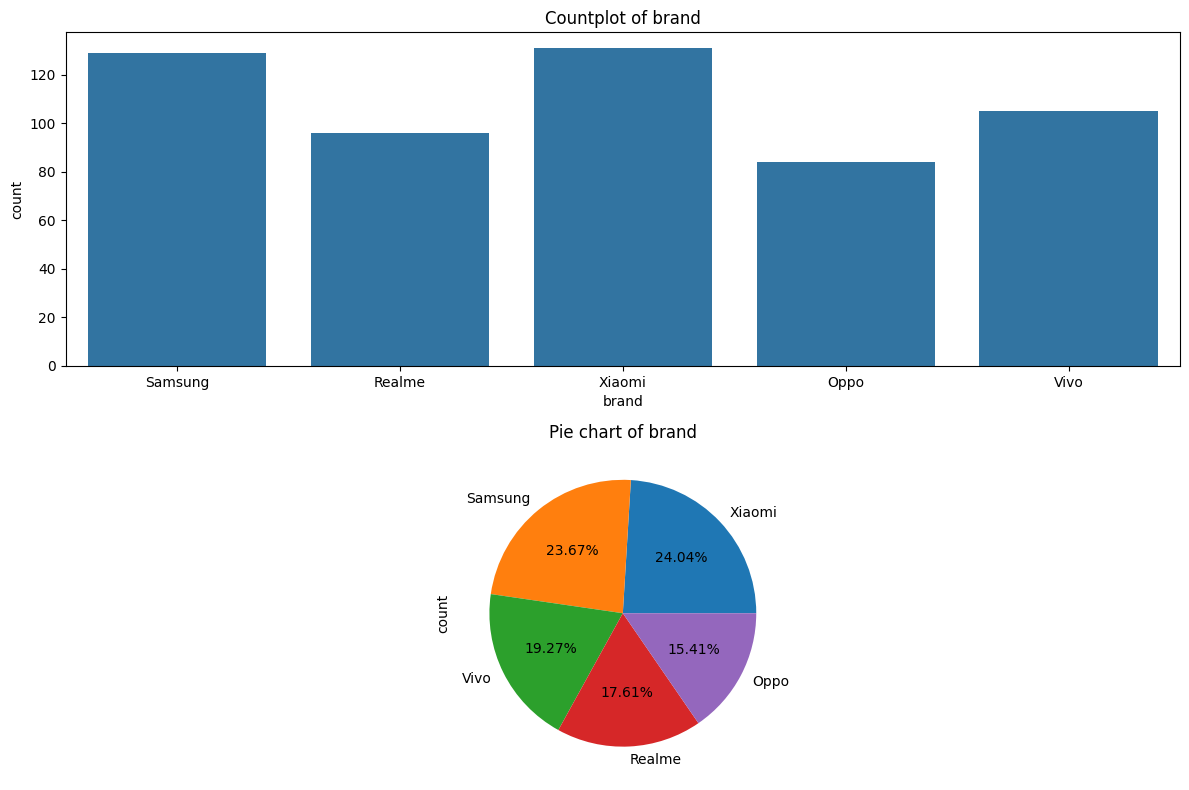

In [ ]:
univariate_categorical_analysis(df["brand"], top_k=5)

In [ ]:
# categorical columns

categorical_columns = df.select_dtypes("object").columns.tolist() + df.select_dtypes("int").columns.tolist()

In [ ]:
categorical_columns

['brand',
 'resolution',
 'num_of_cameras',
 'number_of_sim',
 'number_of_cores',
 'memory',
 'storage',
 'capacity',
 'fast_charging_power',
 'refresh_rate',
 'card_size']

The number of unique values in brand are: 43



,count,proportion
brand,,
Xiaomi,131,13.66
Samsung,129,13.45
Vivo,105,10.95
Realme,96,10.01
Oppo,84,8.76



The number of missing values in brand are: 0




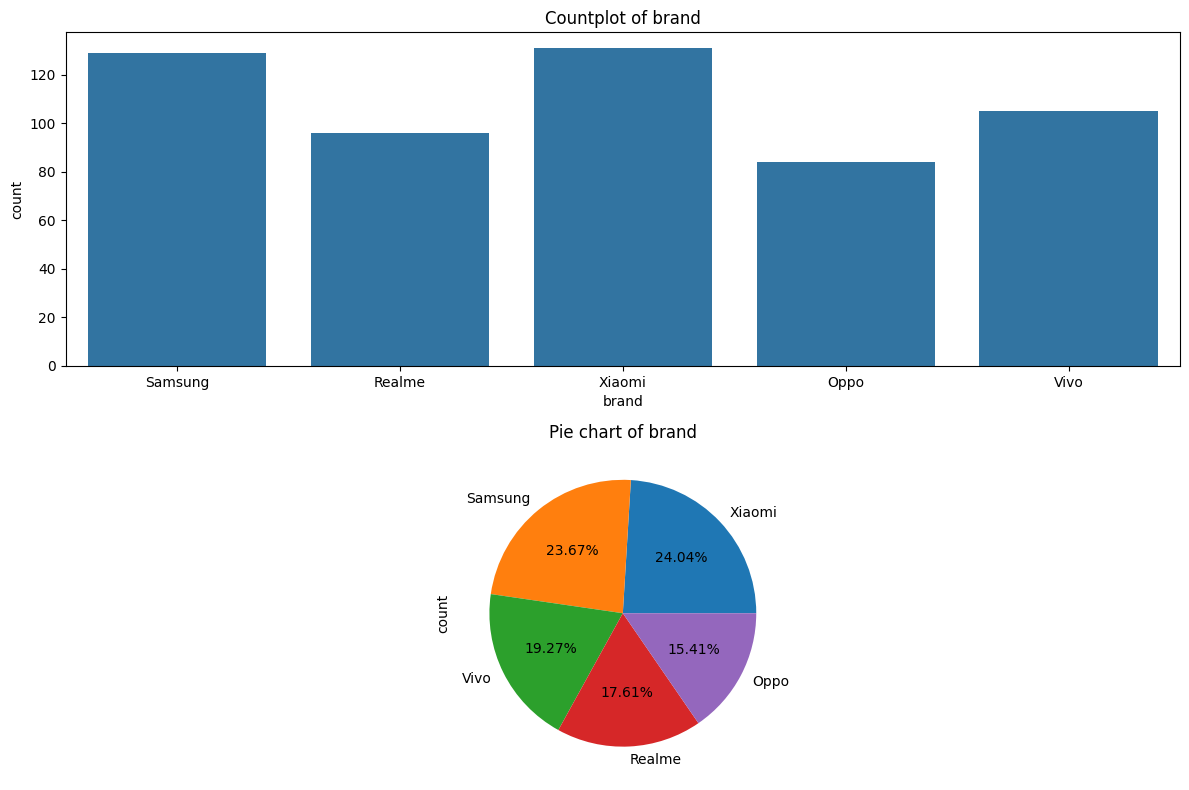

The number of unique values in resolution are: 75



,count,proportion
resolution,,
1080 x 2400,342,35.77
720 x 1600,148,15.48
1080 x 2408,64,6.69
1080 x 2412,57,5.96
1080 x 2340,43,4.50



The number of missing values in resolution are: 3




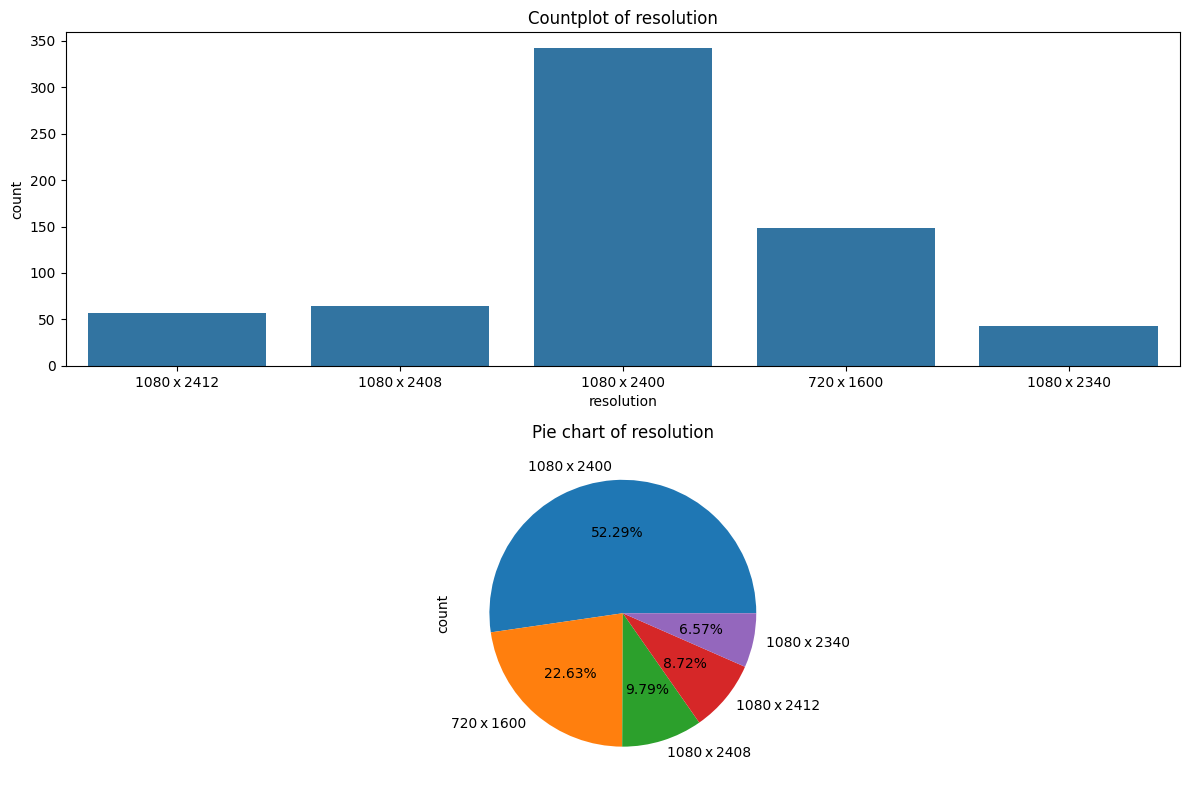

The number of unique values in num_of_cameras are: 6



,count,proportion
num_of_cameras,,
Triple,534,55.68
Dual,199,20.75
Quad,152,15.85
Single,57,5.94
Zero,16,1.67



The number of missing values in num_of_cameras are: 0




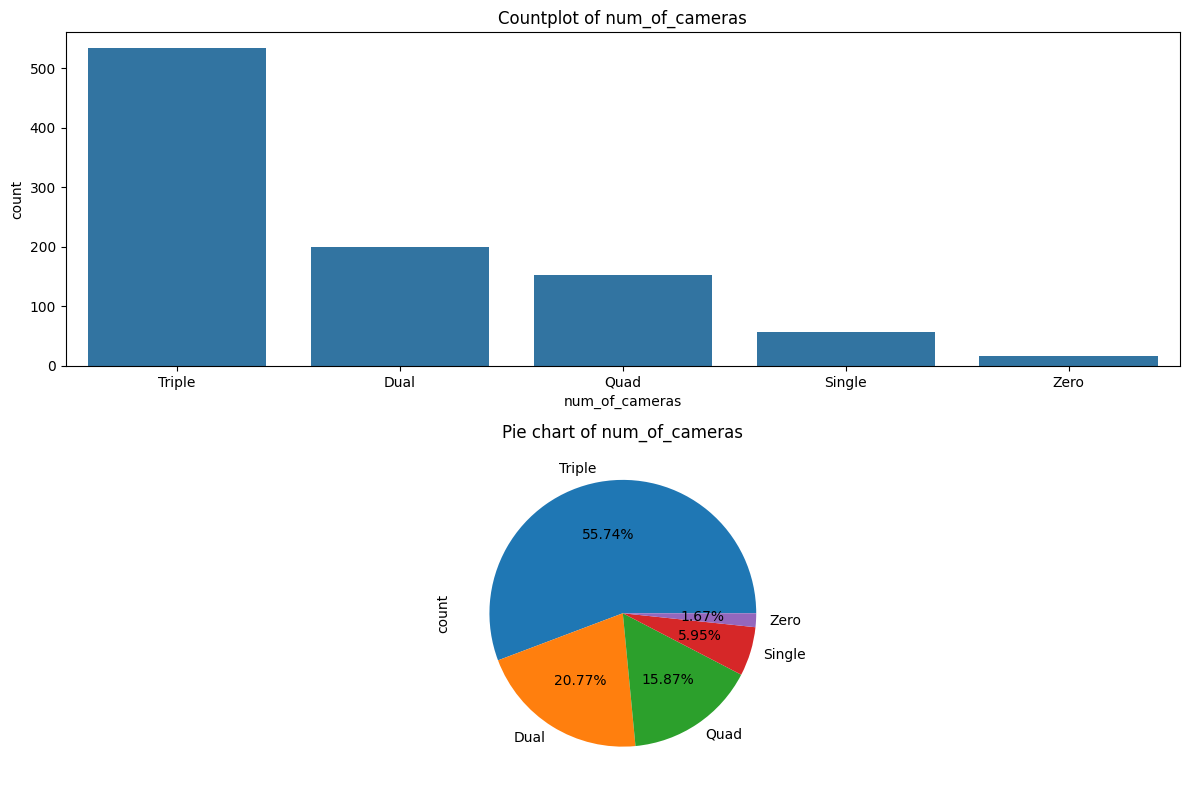

The number of unique values in number_of_sim are: 2



,count,proportion
number_of_sim,,
2,944,98.44
1,15,1.56



The number of missing values in number_of_sim are: 0




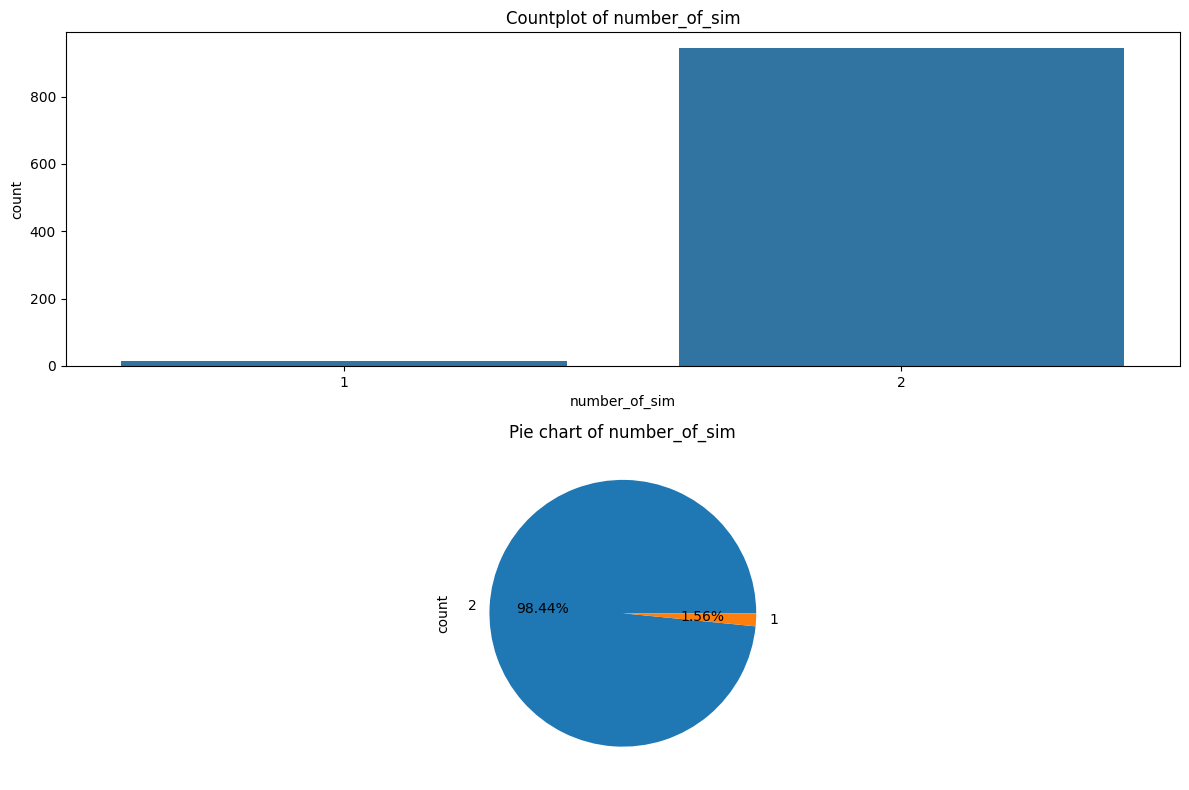

The number of unique values in number_of_cores are: 4



,count,proportion
number_of_cores,,
8,880,91.76
6,39,4.07
4,33,3.44
1,7,0.73



The number of missing values in number_of_cores are: 0




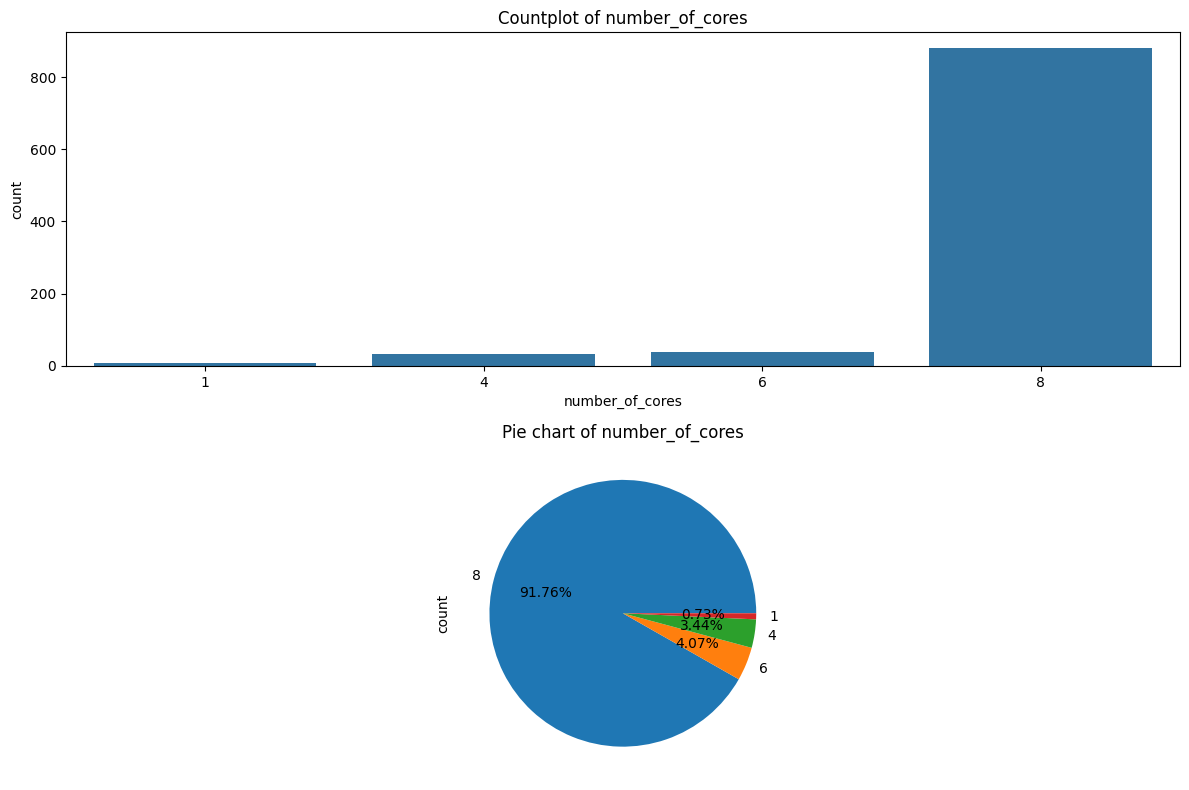

The number of unique values in memory are: 9



,count,proportion
memory,,
8,340,35.45
6,234,24.40
4,213,22.21
12,75,7.82
3,50,5.21



The number of missing values in memory are: 0




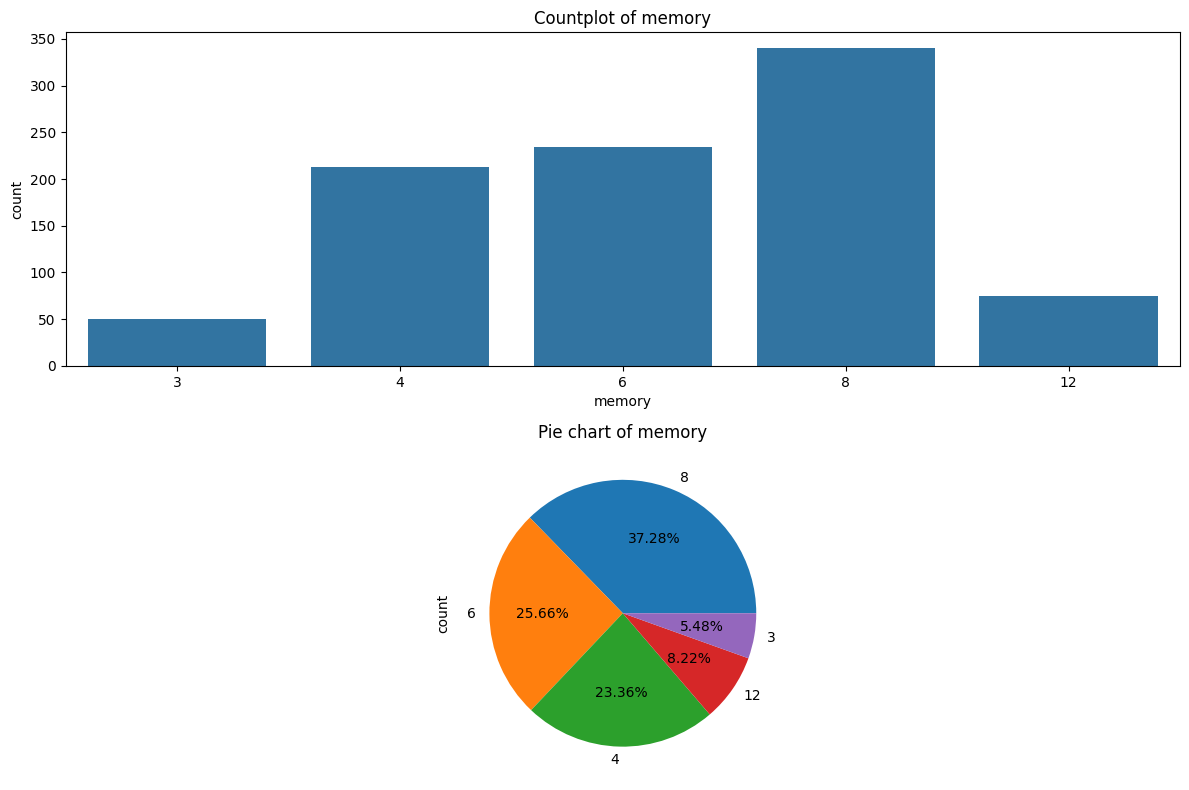

The number of unique values in storage are: 7



,count,proportion
storage,,
128,523,54.54
64,192,20.02
256,146,15.22
32,63,6.57
512,21,2.19



The number of missing values in storage are: 0




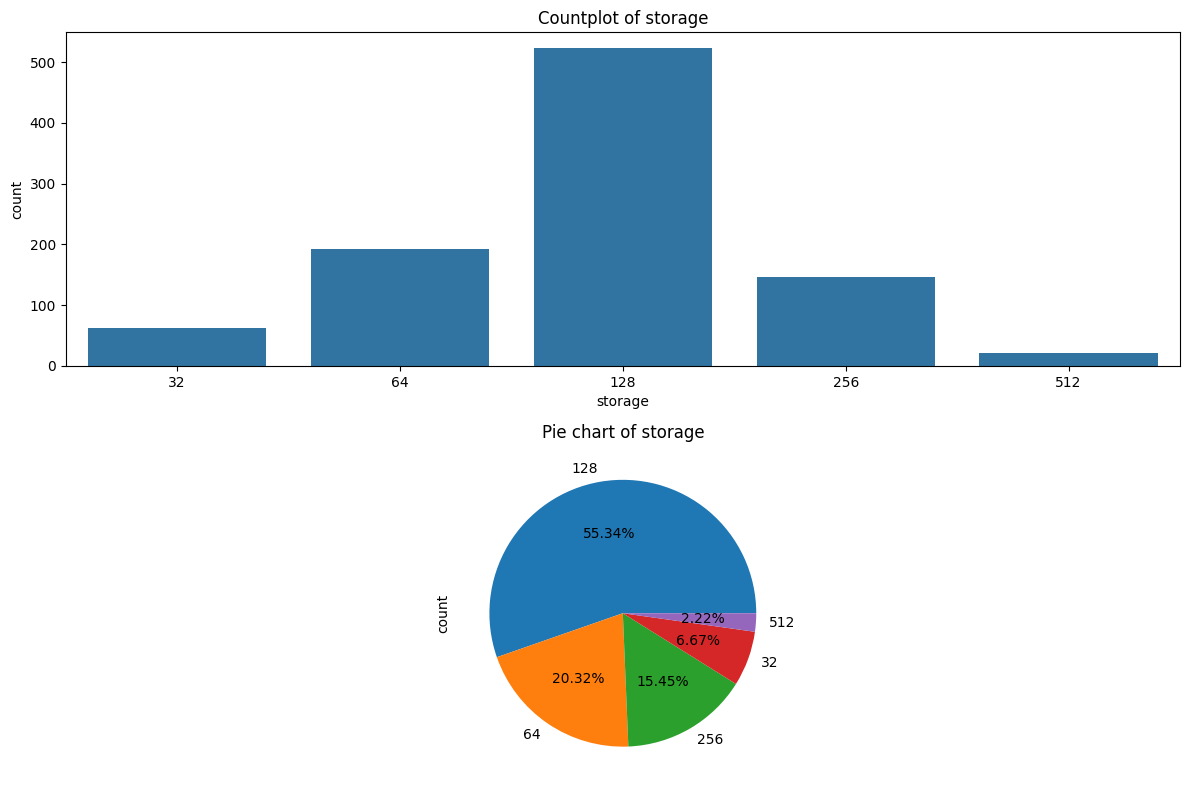

The number of unique values in capacity are: 81



,count,proportion
capacity,,
5000,498,51.93
4500,94,9.80
6000,60,6.26
4000,40,4.17
4700,27,2.82



The number of missing values in capacity are: 0




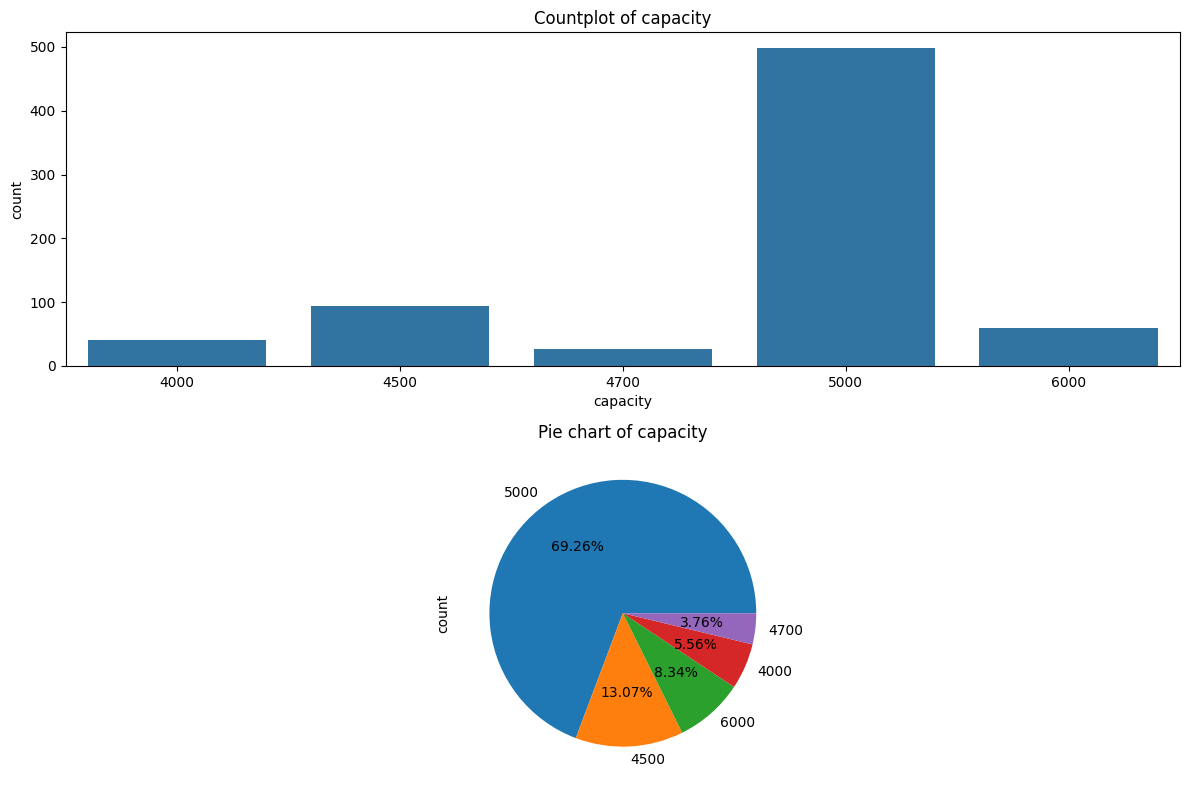

The number of unique values in fast_charging_power are: 34



,count,proportion
fast_charging_power,,
0,205,21.38
33,151,15.75
18,126,13.14
67,62,6.47
25,50,5.21



The number of missing values in fast_charging_power are: 0




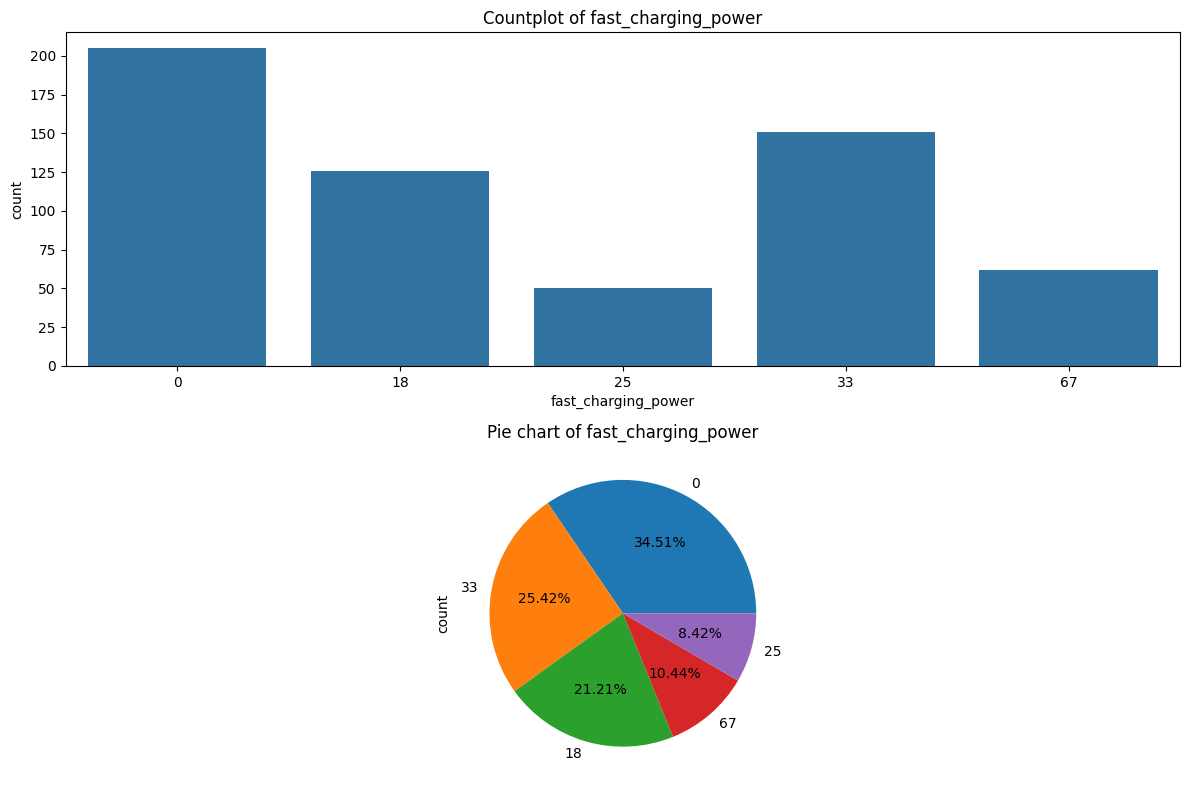

The number of unique values in refresh_rate are: 6



,count,proportion
refresh_rate,,
60,360,37.54
120,333,34.72
90,217,22.63
144,39,4.07
165,9,0.94



The number of missing values in refresh_rate are: 0




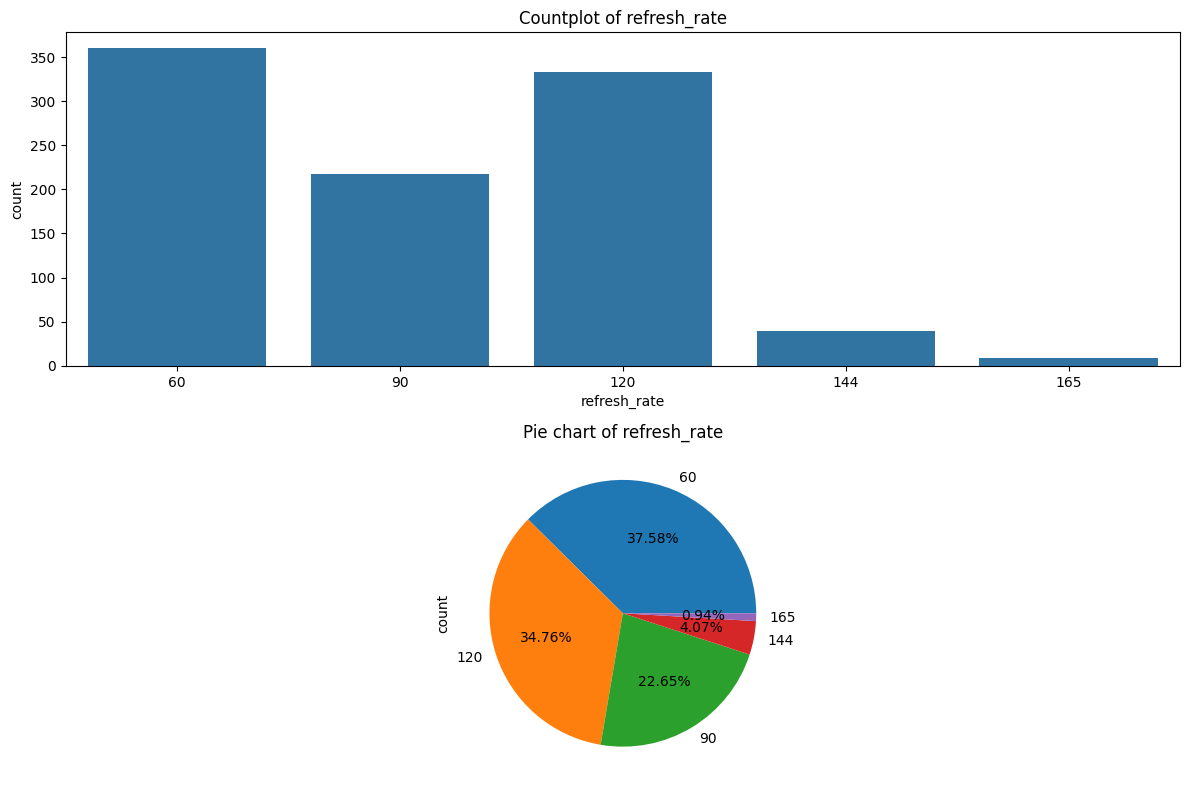

The number of unique values in card_size are: 9



,count,proportion
card_size,,
0,464,48.38
1024,261,27.22
512,116,12.10
256,100,10.43
128,7,0.73



The number of missing values in card_size are: 0




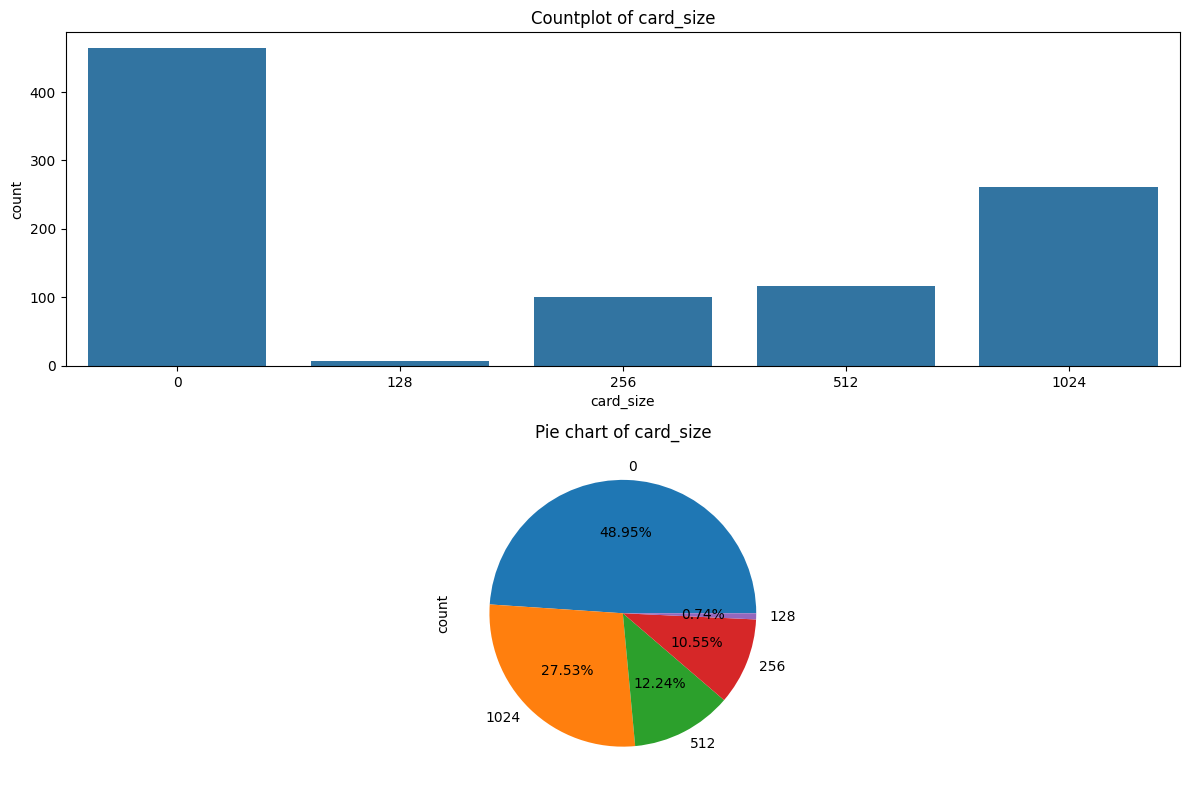

In [ ]:
for cat_col in categorical_columns:
    univariate_categorical_analysis(df[cat_col])

In [ ]:
from matplotlib.gridspec import GridSpec

In [ ]:
def univariate_cont_analysis(ser: pd.Series, hue=None, figsize=(10,6)):

    """
    Performs univariate analysis on continuous numeric variables with multiple visualizations.

    Features:
    - Displays a statistical summary (count, mean, std, quartiles, min, max).
    - Plots four types of charts in a single figure:
        - Box plot
        - Histogram
        - KDE (Kernel Density Estimate) plot
        - Violin plot
    - Supports grouping by a categorical variable using the `hue` parameter.
    - Allows customization of figure size.

    Parameters
    ----------
    ser : pd.Series
        Continuous numeric data to analyze.
    hue : pd.Series or None, optional
        Categorical grouping variable for color coding plots, by default None.
    figsize : tuple, optional
        Figure size (width, height) in inches, by default (10, 6).

    Returns
    -------
    None
        Displays statistical summary and plots inline.
    """

    # generate statistical summary
    stat_summary = ser.describe()
    display(stat_summary)

    # plots
    fig = plt.figure(figsize=figsize)

    gs = GridSpec(2,3, figure=fig, width_ratios=[1.3, 3, 1.3])

    ax1 = fig.add_subplot(gs[1,0])
    ax2 = fig.add_subplot(gs[0,:])
    ax3 = fig.add_subplot(gs[1,1:-1])
    ax4 = fig.add_subplot(gs[1,-1])

    if hue is not None:
        # box plot
        sns.boxplot(y=ser, ax=ax1, hue=hue)

        # histogram
        sns.histplot(x=ser, ax=ax2, hue=hue)

        # kde plot
        sns.kdeplot(x=ser, ax=ax3, hue=hue)

        # violon plot
        sns.violinplot(y=ser, ax=ax4, hue=hue)

        plt.tight_layout()
        plt.show()

        # box plot
        sns.boxplot(y=ser, ax=ax1)

        # histogram
        sns.histplot(x=ser, ax=ax2)

        # kde plot
        sns.kdeplot(x=ser, ax=ax3)

        # violon plot
        sns.violinplot(y=ser, ax=ax4)

        plt.tight_layout()
        plt.show()

In [ ]:
df.select_dtypes("float").columns

Index(['price', 'rating', 'cpu_speed', 'display_size', 'rear_camera',
       'front_camera'],
      dtype='object')

,price
count,959.000000
mean,4.352198
std,0.330049
min,3.653116
25%,4.113910
50%,4.300813
75%,4.544056
max,5.812913


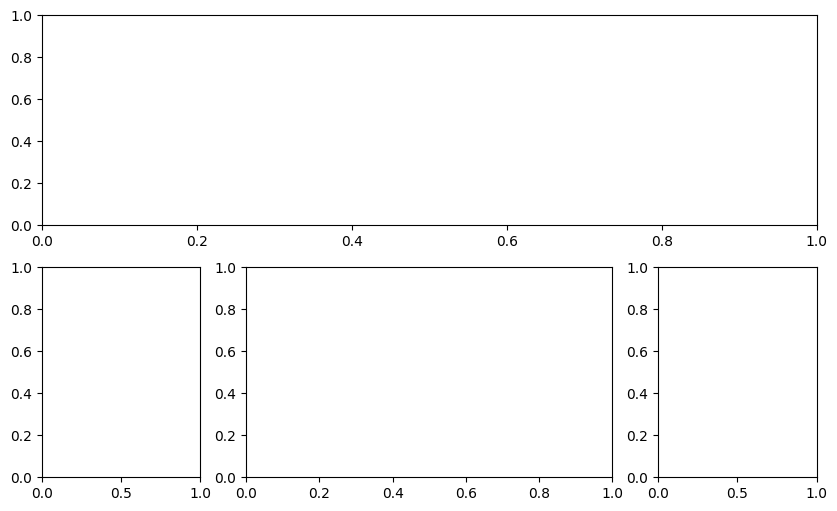

In [ ]:
univariate_cont_analysis(np.log10(df["price"]))

## Bivariate Analysis

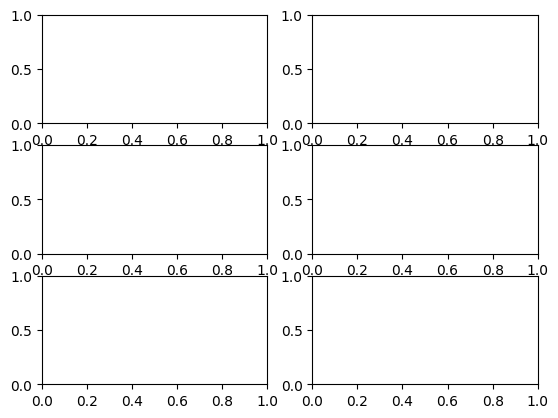

In [ ]:
fig, ax = plt.subplots(3, 2)

In [ ]:
ax.shape

(3, 2)

In [ ]:
def bivar_num_cat_analysis(df: pd.DataFrame, num_column, cat_column, func="mean", figsize=(12,8)):

    """
    Performs bivariate analysis between a numeric and a categorical variable using multiple visualizations.

    Visualizations included:
    - Box plot of the numeric variable grouped by the categorical variable.
    - Histogram of the numeric variable colored by categories.
    - KDE (Kernel Density Estimate) plot by categories.
    - Violin plot of numeric data by categories.
    - Bar plot showing an aggregate statistic (mean by default) of the numeric variable for each category.

    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame containing the data.
    num_column : str
        Name of the numeric column to analyze.
    cat_column : str
        Name of the categorical column to group by.
    func : function or str, optional
        Aggregation function for the bar plot (default is "mean").
    figsize : tuple, optional
        Size of the matplotlib figure (width, height), default is (12, 8).

    Returns
    -------
    None
        Displays multiple plots for visual exploratory analysis.
    """

    fig, ax = plt.subplots(3, 2, figsize=figsize)

    # box plot
    sns.boxplot(data=df,x=cat_column, y=num_column, ax=ax[0][0])

    # # histogram
    sns.histplot(data=df,x=num_column, hue=cat_column, ax=ax[0][1])

    # # kde plot
    sns.kdeplot(data=df,x=num_column, hue=cat_column, ax=ax[1][0])

    # # violon plot
    sns.violinplot(data=df,x=cat_column, y=num_column, ax=ax[1][1])

    # # bar plot
    sns.barplot(data=df,x=cat_column, y=num_column, estimator=func, ax=ax[2][0])

    # delete axis
    plt.delaxes(ax[2][1])

    plt.tight_layout()
    plt.show()

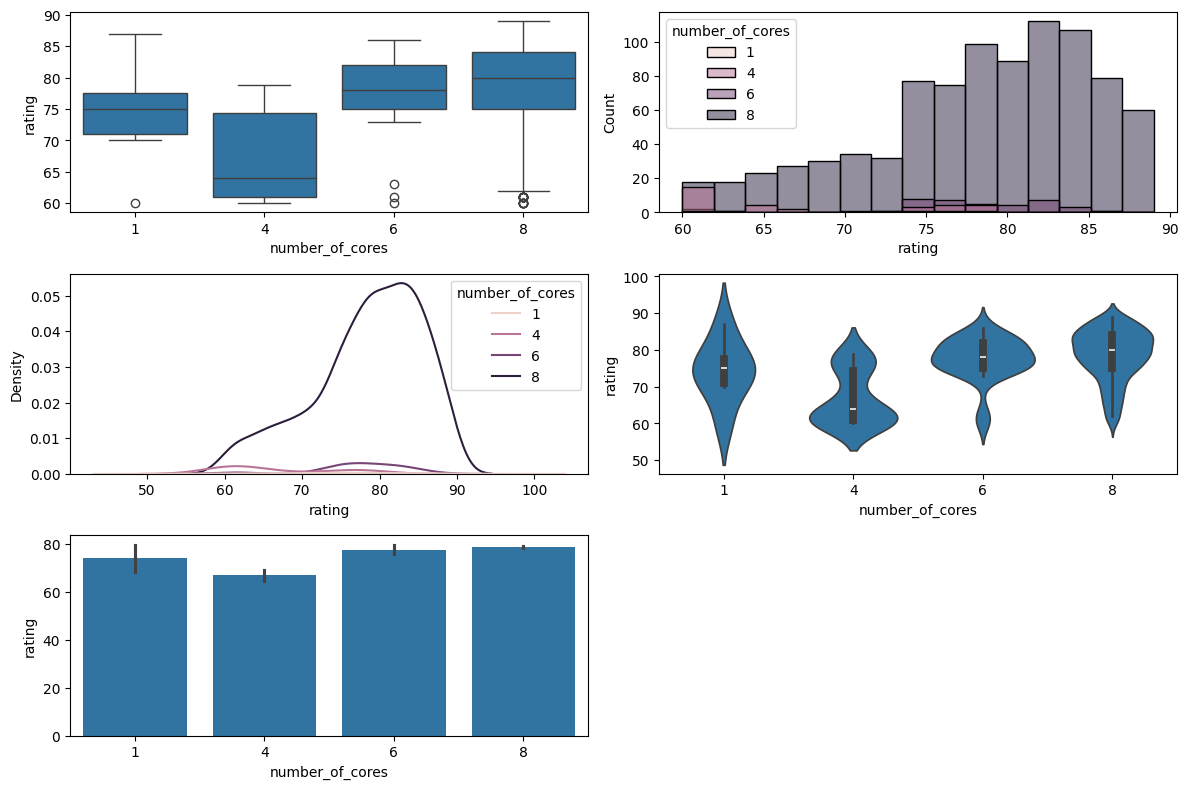

In [ ]:
bivar_num_cat_analysis(df, "rating", "number_of_cores")

,rating
count,880.000000
mean,78.544557
std,7.035872
min,60.000000
25%,75.000000
50%,80.000000
75%,84.000000
max,89.000000


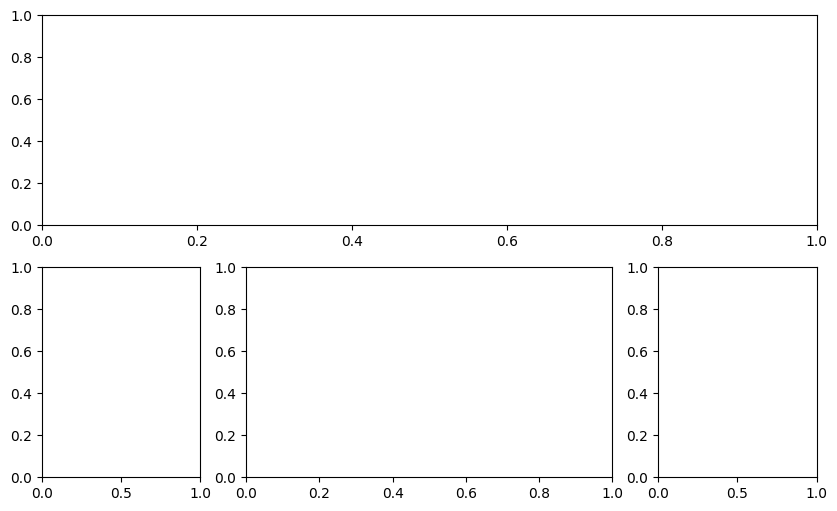

In [ ]:
univariate_cont_analysis(df.loc[df["number_of_cores"] == 8, "rating"])

In [ ]:
from scipy.stats import f_oneway

In [ ]:
temp = (
        df
        .groupby("brand")["price"]
    )

In [ ]:
for data in temp:
    print(data[0])
    print()
    # display(data[1])
    print(type(data[1]))
    break

Apple

<class 'pandas.core.series.Series'>


In [ ]:
def perform_anova(df: pd.DataFrame, num_col, cat_col, alpha=0.05):
    """
    Performs one-way ANOVA to test if there are significant differences in the numeric variable
    across the categories of a categorical variable.

    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame containing the data.
    num_col : str
        Name of the numeric column to analyze.
    cat_col : str
        Name of the categorical column to group by.
    alpha : float, optional
        Significance level for the hypothesis test (default is 0.05).

    Returns
    -------
    None
        Prints the result of the hypothesis test:
        - Reject H0 if p-value ≤ alpha, indicating the categorical variable affects the numeric variable.
        - Fail to reject H0 otherwise.
    """
    grouper = (
        df
        .groupby(cat_col)[num_col]
    )

    input_data = [data.values for _, data in grouper]

    stat, p_val = f_oneway(*input_data)

    if p_val <= alpha:
        print(f"Reject H0: {cat_col} has a significant effect on {num_col} (p-value={p_val:.4f})")
    else:
        print(f"Fail to reject H0: {cat_col} has no significant effect on {num_col} (p-value={p_val:.4f})")


In [ ]:
perform_anova(df, "price", "brand")

Reject H0: brand has a significant effect on price (p-value=0.0000)


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
def perform_chi2_test(df: pd.DataFrame, cat_col_1, cat_col_2, alpha=0.05):
    """
    Performs a Chi-square test of independence to determine if there is a significant
    association between two categorical variables.

    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame containing the data.
    cat_col_1 : str
        Name of the first categorical column.
    cat_col_2 : str
        Name of the second categorical column.
    alpha : float, optional
        Significance level for the hypothesis test (default is 0.05).

    Returns
    -------
    None
        Prints the result of the hypothesis test:
        - Reject H0 if p-value ≤ alpha, indicating an association between the variables.
        - Fail to reject H0 otherwise.
    """
    contingency_table = pd.crosstab(index=df[cat_col_1], columns=df[cat_col_2])

    _, p_val, _, _ = chi2_contingency(contingency_table)

    if p_val <= alpha:
        print(f"Reject H0: Categories of '{cat_col_1}' are associated with categories of '{cat_col_2}' (p-value={p_val:.4f})")
    else:
        print(f"Fail to reject H0: Categories of '{cat_col_1}' are not associated with categories of '{cat_col_2}' (p-value={p_val:.4f})")


In [ ]:
perform_chi2_test(df, "brand", "number_of_cores")

Reject H0: Categories of 'brand' are associated with categories of 'number_of_cores' (p-value=0.0000)


In [ ]:
df.loc[df["has_5G"] == False, "rating"].describe()

,rating
count,423.000000
mean,73.183365
std,7.215579
min,60.000000
25%,67.000000
50%,74.000000
75%,78.738000
max,89.000000


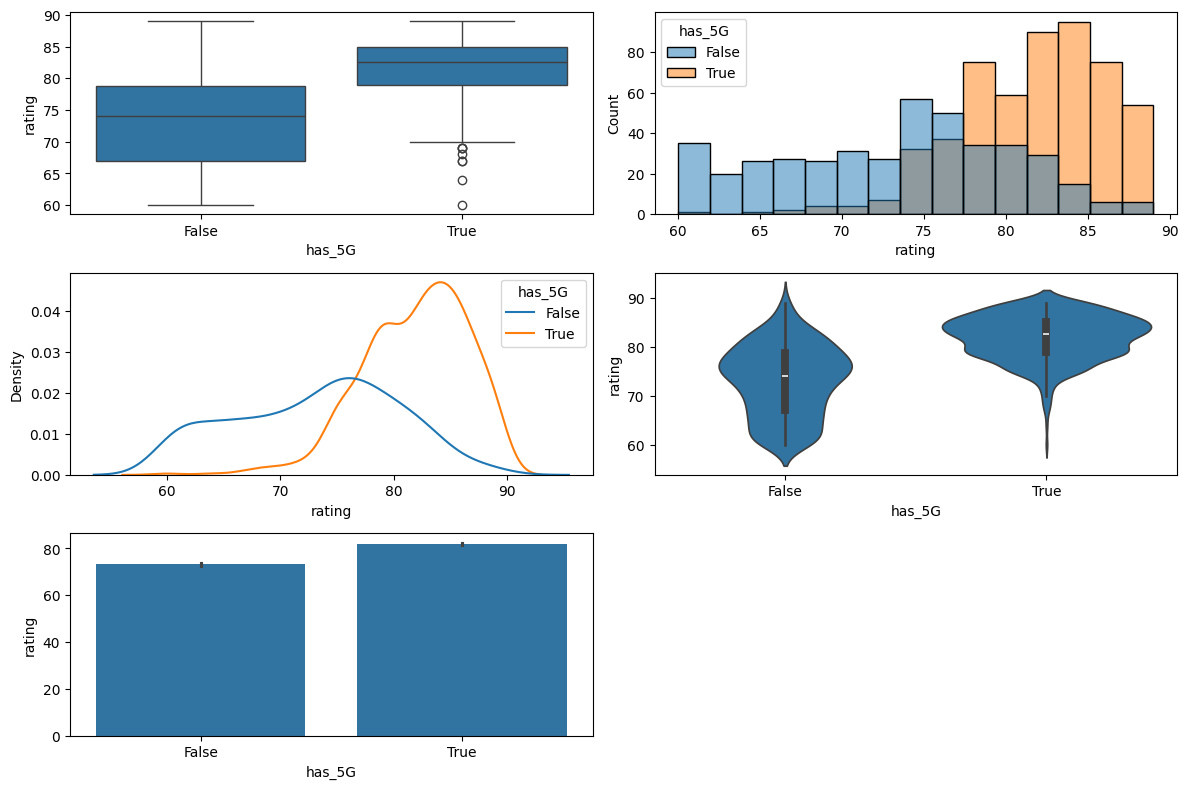

In [ ]:
bivar_num_cat_analysis(df, "rating", "has_5G")